In [42]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pickle

df = pd.read_csv('D3.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      50750 non-null  object
 1   gender                    51766 non-null  object
 2   age                       51756 non-null  object
 3   admission_type_id         51766 non-null  int64 
 4   discharge_disposition_id  51766 non-null  int64 
 5   admission_source_id       51766 non-null  int64 
 6   time_in_hospital          51766 non-null  int64 
 7   medical_specialty         51766 non-null  object
 8   num_lab_procedures        51766 non-null  int64 
 9   num_procedures            51766 non-null  int64 
 10  num_medications           51766 non-null  int64 
 11  number_outpatient         51766 non-null  int64 
 12  number_emergency          51766 non-null  int64 
 13  number_inpatient          51766 non-null  int64 
 14  number_diagnoses      

In [2]:
df['max_glu_serum'].value_counts()

None    51059
>300      354
Norm      241
>200      112
Name: max_glu_serum, dtype: int64

In [3]:
df = df.drop(columns=['max_glu_serum','acetohexamide', 'tolbutamide', 'medical_specialty', 'change'])

In [4]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Hispanic', nan, 'Other', 'Asian'],
      dtype=object)

In [5]:
df['race'].value_counts()

Caucasian          40388
AfricanAmerican     8070
Hispanic            1018
Other                896
Asian                378
Name: race, dtype: int64

In [6]:
df['race'].replace(np.nan, inplace=True)

In [7]:
df['age'].replace(np.nan, inplace=True)

In [8]:
df = pd.get_dummies(df)

In [9]:
y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = X.to_numpy()

In [10]:
rs = 10
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [11]:
model = DecisionTreeClassifier(random_state=rs)

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [13]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.9999448062700077
Test accuracy: 0.5658725048293626


In [14]:
x = model.fit(X_train, y_train)
n_nodes = x.tree_.node_count
print(n_nodes)

20581


In [15]:
tree_rules = export_text(model)
print(tree_rules)

|--- feature_9 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_10 <= 6.50
|   |   |   |   |   |--- feature_27 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 18.00
|   |   |   |   |   |   |   |--- feature_28 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 5.50
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 23.50
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |--- feature_6 >  23.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 38.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  38.00
|   |   |   |   |   |   |   |   |   |

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60      8382
           1       0.53      0.53      0.53      7148

    accuracy                           0.57     15530
   macro avg       0.56      0.56      0.56     15530
weighted avg       0.57      0.57      0.57     15530



In [39]:
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

num_lab_procedures : 0.173461083181863
num_medications : 0.13398308095619607
time_in_hospital : 0.07760429492811526
number_inpatient : 0.06708286974610612
discharge_disposition_id : 0.06019261415170136
num_procedures : 0.05286288255638161
number_diagnoses : 0.04574736096536125
admission_type_id : 0.03357849926972062
number_outpatient : 0.019711565204882382
admission_source_id : 0.01832120044818234
number_emergency : 0.016686792212576643
gender_Female : 0.016671294835508433
age_[60-70) : 0.0161967900986813
age_[70-80) : 0.014536173117618748
gender_Male : 0.014048801526237605
age_[50-60) : 0.01381365806617166
insulin_Steady : 0.013487307108091649
insulin_No : 0.012070882313401563
insulin_Down : 0.011769230621739145
race_Caucasian : 0.01075462898718257


In [18]:
print(X.columns[9])

number_inpatient


In [19]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 20581 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 9] <= 0.5 else to node 13664.
	node=1 is a split node: go to node 2 if X[:, 8] <= 0.5 else to node 12445.
		node=2 is a split node: go to node 3 if X[:, 11] <= 0.5 else to node 2678.
			node=3 is a split node: go to node 4 if X[:, 7] <= 0.5 else to node 2279.
				node=4 is a split node: go to node 5 if X[:, 10] <= 6.5 else to node 522.
					node=5 is a split node: go to node 6 if X[:, 27] <= 0.5 else to node 381.
						node=6 is a split node: go to node 7 if X[:, 1] <= 18.0 else to node 368.
							node=7 is a split node: go to node 8 if X[:, 28] <= 0.5 else to node 303.
								node=8 is a split node: go to node 9 if X[:, 5] <= 5.5 else to node 262.
									node=9 is a split node: go to node 10 if X[:, 6] <= 23.5 else to node 243.
										node=10 is a split node: go to node 11 if X[:, 5] <= 0.5 else to node 140.
											node=11 is a split node: go to node

																			node=162 is a leaf node.
																			node=163 is a leaf node.
																	node=164 is a split node: go to node 165 if X[:, 29] <= 0.5 else to node 200.
																		node=165 is a split node: go to node 166 if X[:, 16] <= 0.5 else to node 197.
																			node=166 is a split node: go to node 167 if X[:, 6] <= 7.5 else to node 172.
																				node=167 is a split node: go to node 168 if X[:, 15] <= 0.5 else to node 169.
																					node=168 is a leaf node.
																					node=169 is a split node: go to node 170 if X[:, 5] <= 2.5 else to node 171.
																						node=170 is a leaf node.
																						node=171 is a leaf node.
																				node=172 is a split node: go to node 173 if X[:, 6] <= 9.5 else to node 190.
																					node=173 is a split node: go to node 174 if X[:, 4] <= 55.5 else to node 189.
																						node=174 is a split node: go to node 175 if X[:, 6] <= 8.5 else to node

																									node=1338 is a leaf node.
																									node=1339 is a leaf node.
																							node=1340 is a leaf node.
																						node=1341 is a leaf node.
																				node=1342 is a leaf node.
																		node=1343 is a split node: go to node 1344 if X[:, 6] <= 9.5 else to node 1351.
																			node=1344 is a split node: go to node 1345 if X[:, 4] <= 36.0 else to node 1346.
																				node=1345 is a leaf node.
																				node=1346 is a split node: go to node 1347 if X[:, 4] <= 40.5 else to node 1348.
																					node=1347 is a leaf node.
																					node=1348 is a split node: go to node 1349 if X[:, 5] <= 2.5 else to node 1350.
																						node=1349 is a leaf node.
																						node=1350 is a leaf node.
																			node=1351 is a split node: go to node 1352 if X[:, 4] <= 39.5 else to node 1353.
																				node=1352 is a leaf node.
																				

														node=2337 is a leaf node.
														node=2338 is a leaf node.
										node=2339 is a split node: go to node 2340 if X[:, 6] <= 9.5 else to node 2343.
											node=2340 is a split node: go to node 2341 if X[:, 18] <= 0.5 else to node 2342.
												node=2341 is a leaf node.
												node=2342 is a leaf node.
											node=2343 is a leaf node.
									node=2344 is a split node: go to node 2345 if X[:, 6] <= 17.0 else to node 2346.
										node=2345 is a leaf node.
										node=2346 is a leaf node.
							node=2347 is a split node: go to node 2348 if X[:, 6] <= 21.0 else to node 2433.
								node=2348 is a split node: go to node 2349 if X[:, 6] <= 14.5 else to node 2426.
									node=2349 is a split node: go to node 2350 if X[:, 7] <= 5.5 else to node 2423.
										node=2350 is a split node: go to node 2351 if X[:, 6] <= 11.5 else to node 2406.
											node=2351 is a split node: go to node 2352 if X[:, 5] <= 2.5 else to node 2403.
												nod

																									node=3311 is a leaf node.
																									node=3312 is a leaf node.
																						node=3313 is a split node: go to node 3314 if X[:, 4] <= 30.5 else to node 3315.
																							node=3314 is a leaf node.
																							node=3315 is a split node: go to node 3316 if X[:, 5] <= 1.5 else to node 3317.
																								node=3316 is a leaf node.
																								node=3317 is a split node: go to node 3318 if X[:, 26] <= 0.5 else to node 3319.
																									node=3318 is a leaf node.
																									node=3319 is a split node: go to node 3320 if X[:, 5] <= 4.5 else to node 3321.
																										node=3320 is a leaf node.
																										node=3321 is a leaf node.
																				node=3322 is a leaf node.
																			node=3323 is a leaf node.
																		node=3324 is a leaf node.
																	node=3325 is a split node: go to node 3326 if X[:, 64] <= 0.5 else to node 3

																						node=4335 is a leaf node.
																			node=4336 is a leaf node.
																	node=4337 is a split node: go to node 4338 if X[:, 25] <= 0.5 else to node 4343.
																		node=4338 is a split node: go to node 4339 if X[:, 17] <= 0.5 else to node 4342.
																			node=4339 is a split node: go to node 4340 if X[:, 36] <= 0.5 else to node 4341.
																				node=4340 is a leaf node.
																				node=4341 is a leaf node.
																			node=4342 is a leaf node.
																		node=4343 is a split node: go to node 4344 if X[:, 10] <= 7.0 else to node 4345.
																			node=4344 is a leaf node.
																			node=4345 is a leaf node.
																node=4346 is a split node: go to node 4347 if X[:, 6] <= 23.0 else to node 4358.
																	node=4347 is a split node: go to node 4348 if X[:, 62] <= 0.5 else to node 4355.
																		node=4348 is a split node: go to node 4349 if X[:, 63] <= 0.5 else to n

																													node=4993 is a leaf node.
																												node=4994 is a split node: go to node 4995 if X[:, 10] <= 6.5 else to node 4996.
																													node=4995 is a leaf node.
																													node=4996 is a leaf node.
																										node=4997 is a split node: go to node 4998 if X[:, 10] <= 4.5 else to node 4999.
																											node=4998 is a leaf node.
																											node=4999 is a split node: go to node 5000 if X[:, 23] <= 0.5 else to node 5009.
																												node=5000 is a split node: go to node 5001 if X[:, 10] <= 8.5 else to node 5002.
																													node=5001 is a leaf node.
																													node=5002 is a split node: go to node 5003 if X[:, 6] <= 13.5 else to node 5004.
																														node=5003 is a leaf node.
																														node=5004 is a split node: go to node 5005 if X[:, 6] <= 20.5 else to node 5006.
																	

																			node=5287 is a split node: go to node 5288 if X[:, 4] <= 64.0 else to node 5297.
																				node=5288 is a split node: go to node 5289 if X[:, 3] <= 1.5 else to node 5296.
																					node=5289 is a split node: go to node 5290 if X[:, 4] <= 32.5 else to node 5291.
																						node=5290 is a leaf node.
																						node=5291 is a split node: go to node 5292 if X[:, 61] <= 0.5 else to node 5293.
																							node=5292 is a leaf node.
																							node=5293 is a split node: go to node 5294 if X[:, 4] <= 55.5 else to node 5295.
																								node=5294 is a leaf node.
																								node=5295 is a leaf node.
																					node=5296 is a leaf node.
																				node=5297 is a leaf node.
																	node=5298 is a split node: go to node 5299 if X[:, 4] <= 51.5 else to node 5316.
																		node=5299 is a split node: go to node 5300 if X[:, 2] <= 5.5 else to node 5307.
					

																							node=5982 is a leaf node.
																					node=5983 is a leaf node.
																				node=5984 is a leaf node.
																			node=5985 is a split node: go to node 5986 if X[:, 6] <= 23.5 else to node 6001.
																				node=5986 is a split node: go to node 5987 if X[:, 63] <= 0.5 else to node 5992.
																					node=5987 is a split node: go to node 5988 if X[:, 50] <= 0.5 else to node 5991.
																						node=5988 is a split node: go to node 5989 if X[:, 62] <= 0.5 else to node 5990.
																							node=5989 is a leaf node.
																							node=5990 is a leaf node.
																						node=5991 is a leaf node.
																					node=5992 is a split node: go to node 5993 if X[:, 10] <= 8.5 else to node 5996.
																						node=5993 is a split node: go to node 5994 if X[:, 6] <= 21.5 else to node 5995.
																							node=5994 is a leaf node.
																							node=5995 is a leaf node.
			

										node=7333 is a split node: go to node 7334 if X[:, 3] <= 12.0 else to node 7335.
											node=7334 is a leaf node.
											node=7335 is a split node: go to node 7336 if X[:, 0] <= 2.5 else to node 7337.
												node=7336 is a leaf node.
												node=7337 is a leaf node.
							node=7338 is a split node: go to node 7339 if X[:, 62] <= 0.5 else to node 9070.
								node=7339 is a split node: go to node 7340 if X[:, 6] <= 8.5 else to node 7385.
									node=7340 is a split node: go to node 7341 if X[:, 10] <= 7.5 else to node 7364.
										node=7341 is a split node: go to node 7342 if X[:, 1] <= 2.5 else to node 7359.
											node=7342 is a split node: go to node 7343 if X[:, 17] <= 0.5 else to node 7348.
												node=7343 is a split node: go to node 7344 if X[:, 4] <= 55.0 else to node 7345.
													node=7344 is a leaf node.
													node=7345 is a split node: go to node 7346 if X[:, 63] <= 0.5 else to node 7347.
														node=7346 is a le

																			node=7800 is a leaf node.
																node=7801 is a split node: go to node 7802 if X[:, 55] <= 0.5 else to node 7813.
																	node=7802 is a split node: go to node 7803 if X[:, 40] <= 0.5 else to node 7812.
																		node=7803 is a split node: go to node 7804 if X[:, 1] <= 16.5 else to node 7811.
																			node=7804 is a split node: go to node 7805 if X[:, 4] <= 81.5 else to node 7810.
																				node=7805 is a split node: go to node 7806 if X[:, 6] <= 59.5 else to node 7807.
																					node=7806 is a leaf node.
																					node=7807 is a split node: go to node 7808 if X[:, 1] <= 4.5 else to node 7809.
																						node=7808 is a leaf node.
																						node=7809 is a leaf node.
																				node=7810 is a leaf node.
																			node=7811 is a leaf node.
																		node=7812 is a leaf node.
																	node=7813 is a leaf node.
															node=7814 is a split no

																																				node=8353 is a split node: go to node 8354 if X[:, 4] <= 54.5 else to node 8355.
																																					node=8354 is a leaf node.
																																					node=8355 is a split node: go to node 8356 if X[:, 17] <= 0.5 else to node 8359.
																																						node=8356 is a split node: go to node 8357 if X[:, 4] <= 56.0 else to node 8358.
																																							node=8357 is a leaf node.
																																							node=8358 is a leaf node.
																																						node=8359 is a split node: go to node 8360 if X[:, 6] <= 21.0 else to node 8363.
																																							node=8360 is a split node: go to node 8361 if X[:, 3] <= 8.5 else to node 8362.
																																								node=8361 is a leaf node.
																																								node=8362 is a leaf node.
																																							node=8363 is a split node: go to node 8364 i

																			node=9331 is a leaf node.
																		node=9332 is a split node: go to node 9333 if X[:, 5] <= 1.5 else to node 9334.
																			node=9333 is a leaf node.
																			node=9334 is a split node: go to node 9335 if X[:, 4] <= 70.5 else to node 9336.
																				node=9335 is a leaf node.
																				node=9336 is a leaf node.
															node=9337 is a split node: go to node 9338 if X[:, 33] <= 0.5 else to node 9371.
																node=9338 is a split node: go to node 9339 if X[:, 4] <= 70.5 else to node 9364.
																	node=9339 is a split node: go to node 9340 if X[:, 3] <= 10.0 else to node 9363.
																		node=9340 is a split node: go to node 9341 if X[:, 4] <= 60.5 else to node 9358.
																			node=9341 is a split node: go to node 9342 if X[:, 6] <= 22.5 else to node 9355.
																				node=9342 is a split node: go to node 9343 if X[:, 0] <= 1.5 else to node 9352.
																					node=9343

												node=10041 is a split node: go to node 10042 if X[:, 64] <= 0.5 else to node 10043.
													node=10042 is a leaf node.
													node=10043 is a leaf node.
												node=10044 is a split node: go to node 10045 if X[:, 4] <= 42.5 else to node 10050.
													node=10045 is a split node: go to node 10046 if X[:, 3] <= 4.5 else to node 10049.
														node=10046 is a split node: go to node 10047 if X[:, 4] <= 35.0 else to node 10048.
															node=10047 is a leaf node.
															node=10048 is a leaf node.
														node=10049 is a leaf node.
													node=10050 is a leaf node.
										node=10051 is a split node: go to node 10052 if X[:, 18] <= 0.5 else to node 10137.
											node=10052 is a split node: go to node 10053 if X[:, 5] <= 4.5 else to node 10126.
												node=10053 is a split node: go to node 10054 if X[:, 6] <= 13.5 else to node 10075.
													node=10054 is a split node: go to node 10055 if X[:, 4] <= 53.0 else to 

														node=10669 is a leaf node.
														node=10670 is a leaf node.
													node=10671 is a split node: go to node 10672 if X[:, 6] <= 15.0 else to node 10673.
														node=10672 is a leaf node.
														node=10673 is a split node: go to node 10674 if X[:, 6] <= 16.5 else to node 10677.
															node=10674 is a split node: go to node 10675 if X[:, 4] <= 58.5 else to node 10676.
																node=10675 is a leaf node.
																node=10676 is a leaf node.
															node=10677 is a split node: go to node 10678 if X[:, 30] <= 0.5 else to node 10679.
																node=10678 is a leaf node.
																node=10679 is a split node: go to node 10680 if X[:, 6] <= 21.5 else to node 10681.
																	node=10680 is a leaf node.
																	node=10681 is a leaf node.
										node=10682 is a split node: go to node 10683 if X[:, 32] <= 0.5 else to node 10692.
											node=10683 is a split node: go to node 10684 if X[:, 1] <= 6.5

																		node=11014 is a split node: go to node 11015 if X[:, 3] <= 5.5 else to node 11020.
																			node=11015 is a split node: go to node 11016 if X[:, 1] <= 4.5 else to node 11019.
																				node=11016 is a split node: go to node 11017 if X[:, 10] <= 5.5 else to node 11018.
																					node=11017 is a leaf node.
																					node=11018 is a leaf node.
																				node=11019 is a leaf node.
																			node=11020 is a leaf node.
															node=11021 is a leaf node.
														node=11022 is a split node: go to node 11023 if X[:, 33] <= 0.5 else to node 11024.
															node=11023 is a leaf node.
															node=11024 is a leaf node.
													node=11025 is a split node: go to node 11026 if X[:, 1] <= 14.5 else to node 11033.
														node=11026 is a split node: go to node 11027 if X[:, 5] <= 0.5 else to node 11028.
															node=11027 is a leaf node.
															node=11028 is a split node: g

																							node=11586 is a leaf node.
																							node=11587 is a leaf node.
																						node=11588 is a leaf node.
																					node=11589 is a leaf node.
																				node=11590 is a leaf node.
															node=11591 is a split node: go to node 11592 if X[:, 4] <= 50.0 else to node 11625.
																node=11592 is a split node: go to node 11593 if X[:, 6] <= 16.5 else to node 11602.
																	node=11593 is a split node: go to node 11594 if X[:, 25] <= 0.5 else to node 11599.
																		node=11594 is a split node: go to node 11595 if X[:, 0] <= 2.5 else to node 11596.
																			node=11595 is a leaf node.
																			node=11596 is a split node: go to node 11597 if X[:, 28] <= 0.5 else to node 11598.
																				node=11597 is a leaf node.
																				node=11598 is a leaf node.
																		node=11599 is a split node: go to node 11600 if X[:, 35] <= 0.5 else to node 11601.
										

											node=12946 is a split node: go to node 12947 if X[:, 4] <= 67.5 else to node 13264.
												node=12947 is a split node: go to node 12948 if X[:, 7] <= 2.5 else to node 13243.
													node=12948 is a split node: go to node 12949 if X[:, 4] <= 38.5 else to node 13050.
														node=12949 is a split node: go to node 12950 if X[:, 23] <= 0.5 else to node 13049.
															node=12950 is a split node: go to node 12951 if X[:, 6] <= 15.5 else to node 13018.
																node=12951 is a split node: go to node 12952 if X[:, 4] <= 28.5 else to node 12979.
																	node=12952 is a split node: go to node 12953 if X[:, 4] <= 24.5 else to node 12976.
																		node=12953 is a split node: go to node 12954 if X[:, 4] <= 10.5 else to node 12973.
																			node=12954 is a split node: go to node 12955 if X[:, 3] <= 2.5 else to node 12968.
																				node=12955 is a split node: go to node 12956 if X[:, 5] <= 3.5 else to node 12965.
								

															node=13355 is a split node: go to node 13356 if X[:, 26] <= 0.5 else to node 13365.
																node=13356 is a split node: go to node 13357 if X[:, 8] <= 3.5 else to node 13362.
																	node=13357 is a split node: go to node 13358 if X[:, 18] <= 0.5 else to node 13359.
																		node=13358 is a leaf node.
																		node=13359 is a split node: go to node 13360 if X[:, 6] <= 15.5 else to node 13361.
																			node=13360 is a leaf node.
																			node=13361 is a leaf node.
																	node=13362 is a split node: go to node 13363 if X[:, 15] <= 0.5 else to node 13364.
																		node=13363 is a leaf node.
																		node=13364 is a leaf node.
																node=13365 is a leaf node.
														node=13366 is a leaf node.
												node=13367 is a split node: go to node 13368 if X[:, 6] <= 14.5 else to node 13379.
													node=13368 is a split node: go to node 13369 if X[:, 7] <= 1.5 else to node 13

												node=13601 is a split node: go to node 13602 if X[:, 4] <= 53.0 else to node 13605.
													node=13602 is a split node: go to node 13603 if X[:, 33] <= 0.5 else to node 13604.
														node=13603 is a leaf node.
														node=13604 is a leaf node.
													node=13605 is a split node: go to node 13606 if X[:, 35] <= 0.5 else to node 13609.
														node=13606 is a split node: go to node 13607 if X[:, 7] <= 2.0 else to node 13608.
															node=13607 is a leaf node.
															node=13608 is a leaf node.
														node=13609 is a leaf node.
												node=13610 is a split node: go to node 13611 if X[:, 7] <= 3.5 else to node 13612.
													node=13611 is a leaf node.
													node=13612 is a split node: go to node 13613 if X[:, 4] <= 63.5 else to node 13614.
														node=13613 is a leaf node.
														node=13614 is a leaf node.
										node=13615 is a split node: go to node 13616 if X[:, 2] <= 6.0 else to node 13619.

																				node=14302 is a leaf node.
																		node=14303 is a leaf node.
																	node=14304 is a leaf node.
																node=14305 is a leaf node.
															node=14306 is a split node: go to node 14307 if X[:, 6] <= 4.5 else to node 14308.
																node=14307 is a leaf node.
																node=14308 is a leaf node.
														node=14309 is a split node: go to node 14310 if X[:, 2] <= 4.0 else to node 14311.
															node=14310 is a leaf node.
															node=14311 is a leaf node.
												node=14312 is a leaf node.
											node=14313 is a split node: go to node 14314 if X[:, 15] <= 0.5 else to node 14411.
												node=14314 is a split node: go to node 14315 if X[:, 10] <= 7.5 else to node 14332.
													node=14315 is a split node: go to node 14316 if X[:, 36] <= 0.5 else to node 14329.
														node=14316 is a split node: go to node 14317 if X[:, 24] <= 0.5 else to node 14328.
															node=14317 is a 

														node=15827 is a split node: go to node 15828 if X[:, 4] <= 45.0 else to node 15833.
															node=15828 is a split node: go to node 15829 if X[:, 12] <= 0.5 else to node 15830.
																node=15829 is a leaf node.
																node=15830 is a split node: go to node 15831 if X[:, 5] <= 3.0 else to node 15832.
																	node=15831 is a leaf node.
																	node=15832 is a leaf node.
															node=15833 is a split node: go to node 15834 if X[:, 2] <= 4.0 else to node 15835.
																node=15834 is a leaf node.
																node=15835 is a leaf node.
													node=15836 is a split node: go to node 15837 if X[:, 63] <= 0.5 else to node 15838.
														node=15837 is a leaf node.
														node=15838 is a leaf node.
										node=15839 is a split node: go to node 15840 if X[:, 14] <= 0.5 else to node 15857.
											node=15840 is a split node: go to node 15841 if X[:, 4] <= 37.5 else to node 15842.
												node=1584

																																node=16221 is a split node: go to node 16222 if X[:, 18] <= 0.5 else to node 16223.
																																	node=16222 is a leaf node.
																																	node=16223 is a leaf node.
																															node=16224 is a leaf node.
																														node=16225 is a split node: go to node 16226 if X[:, 28] <= 0.5 else to node 16227.
																															node=16226 is a leaf node.
																															node=16227 is a split node: go to node 16228 if X[:, 62] <= 0.5 else to node 16229.
																																node=16228 is a leaf node.
																																node=16229 is a leaf node.
																													node=16230 is a split node: go to node 16231 if X[:, 2] <= 5.5 else to node 16240.
																														node=16231 is a split node: go to node 16232 if X[:, 63] <= 0.5 else to node 16237.
																															node=16232 is a split node: go to node 16233

																node=16407 is a leaf node.
															node=16408 is a split node: go to node 16409 if X[:, 1] <= 3.5 else to node 16410.
																node=16409 is a leaf node.
																node=16410 is a leaf node.
													node=16411 is a split node: go to node 16412 if X[:, 10] <= 4.5 else to node 16413.
														node=16412 is a leaf node.
														node=16413 is a split node: go to node 16414 if X[:, 5] <= 4.5 else to node 16441.
															node=16414 is a split node: go to node 16415 if X[:, 17] <= 0.5 else to node 16424.
																node=16415 is a split node: go to node 16416 if X[:, 3] <= 1.5 else to node 16419.
																	node=16416 is a split node: go to node 16417 if X[:, 8] <= 1.5 else to node 16418.
																		node=16417 is a leaf node.
																		node=16418 is a leaf node.
																	node=16419 is a split node: go to node 16420 if X[:, 5] <= 3.5 else to node 16421.
																		node=16420 is a leaf node.
					

																		node=17764 is a split node: go to node 17765 if X[:, 3] <= 7.5 else to node 17766.
																			node=17765 is a leaf node.
																			node=17766 is a leaf node.
																		node=17767 is a leaf node.
																	node=17768 is a leaf node.
																node=17769 is a leaf node.
															node=17770 is a leaf node.
														node=17771 is a leaf node.
												node=17772 is a split node: go to node 17773 if X[:, 6] <= 17.5 else to node 17776.
													node=17773 is a split node: go to node 17774 if X[:, 32] <= 0.5 else to node 17775.
														node=17774 is a leaf node.
														node=17775 is a leaf node.
													node=17776 is a leaf node.
											node=17777 is a leaf node.
										node=17778 is a split node: go to node 17779 if X[:, 6] <= 37.5 else to node 17784.
											node=17779 is a split node: go to node 17780 if X[:, 6] <= 17.0 else to node 17783.
												node=17780 is a split node: go to node

																												node=18180 is a split node: go to node 18181 if X[:, 6] <= 12.5 else to node 18186.
																													node=18181 is a split node: go to node 18182 if X[:, 64] <= 0.5 else to node 18185.
																														node=18182 is a split node: go to node 18183 if X[:, 4] <= 37.0 else to node 18184.
																															node=18183 is a leaf node.
																															node=18184 is a leaf node.
																														node=18185 is a leaf node.
																													node=18186 is a leaf node.
																											node=18187 is a split node: go to node 18188 if X[:, 4] <= 39.5 else to node 18195.
																												node=18188 is a split node: go to node 18189 if X[:, 4] <= 33.5 else to node 18190.
																													node=18189 is a leaf node.
																													node=18190 is a split node: go to node 18191 if X[:, 8] <= 0.5 else to node 18192.
																														node=18191 

																		node=18864 is a leaf node.
																		node=18865 is a leaf node.
												node=18866 is a split node: go to node 18867 if X[:, 3] <= 3.0 else to node 18868.
													node=18867 is a leaf node.
													node=18868 is a leaf node.
											node=18869 is a split node: go to node 18870 if X[:, 6] <= 16.5 else to node 18889.
												node=18870 is a split node: go to node 18871 if X[:, 4] <= 42.5 else to node 18886.
													node=18871 is a split node: go to node 18872 if X[:, 55] <= 0.5 else to node 18885.
														node=18872 is a split node: go to node 18873 if X[:, 3] <= 2.5 else to node 18874.
															node=18873 is a leaf node.
															node=18874 is a split node: go to node 18875 if X[:, 4] <= 31.0 else to node 18878.
																node=18875 is a split node: go to node 18876 if X[:, 8] <= 1.5 else to node 18877.
																	node=18876 is a leaf node.
																	node=18877 is a leaf node.
																node=1

											node=19251 is a leaf node.
											node=19252 is a leaf node.
										node=19253 is a leaf node.
								node=19254 is a split node: go to node 19255 if X[:, 14] <= 0.5 else to node 19256.
									node=19255 is a leaf node.
									node=19256 is a leaf node.
							node=19257 is a leaf node.
					node=19258 is a split node: go to node 19259 if X[:, 6] <= 7.5 else to node 19302.
						node=19259 is a split node: go to node 19260 if X[:, 3] <= 4.5 else to node 19299.
							node=19260 is a split node: go to node 19261 if X[:, 61] <= 0.5 else to node 19296.
								node=19261 is a split node: go to node 19262 if X[:, 8] <= 3.5 else to node 19295.
									node=19262 is a split node: go to node 19263 if X[:, 1] <= 3.5 else to node 19292.
										node=19263 is a split node: go to node 19264 if X[:, 11] <= 0.5 else to node 19275.
											node=19264 is a split node: go to node 19265 if X[:, 4] <= 23.5 else to node 19266.
												node=19265 is a leaf node.
										

																node=19818 is a split node: go to node 19819 if X[:, 2] <= 4.0 else to node 19820.
																	node=19819 is a leaf node.
																	node=19820 is a leaf node.
														node=19821 is a leaf node.
													node=19822 is a split node: go to node 19823 if X[:, 62] <= 0.5 else to node 19824.
														node=19823 is a leaf node.
														node=19824 is a leaf node.
												node=19825 is a split node: go to node 19826 if X[:, 4] <= 44.5 else to node 19827.
													node=19826 is a leaf node.
													node=19827 is a leaf node.
									node=19828 is a split node: go to node 19829 if X[:, 1] <= 2.5 else to node 19876.
										node=19829 is a split node: go to node 19830 if X[:, 0] <= 1.5 else to node 19853.
											node=19830 is a split node: go to node 19831 if X[:, 7] <= 5.0 else to node 19852.
												node=19831 is a split node: go to node 19832 if X[:, 33] <= 0.5 else to node 19849.
													node=19832 is a split node: g

In [20]:
params = {'criterion': ['gini', 'entropy'],
         'max_depth': range(1,16),
         'min_samples_leaf': range(0,25,5)[1:]}

CV1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), return_train_score=True)
CV1.fit(X_train, y_train)

results_set = CV1.cv_results_
print(results_set)

{'mean_fit_time': array([0.06522021, 0.06283188, 0.06402855, 0.06323066, 0.07160845,
       0.07839012, 0.07021203, 0.07101107, 0.0833766 , 0.08562136,
       0.09279251, 0.09314957, 0.10592809, 0.10886211, 0.10086675,
       0.10042272, 0.11549816, 0.11109929, 0.10805206, 0.11387939,
       0.12577443, 0.12181225, 0.12920446, 0.12133512, 0.13221688,
       0.13492928, 0.13383312, 0.13746657, 0.14505682, 0.14464893,
       0.14370575, 0.15382185, 0.1593142 , 0.16349473, 0.18233681,
       0.15955486, 0.1796454 , 0.17711277, 0.18210077, 0.1797246 ,
       0.17414093, 0.17353716, 0.17492356, 0.17473245, 0.19048843,
       0.19588323, 0.18710313, 0.19712253, 0.19203529, 0.19977074,
       0.19757767, 0.18994174, 0.20883021, 0.20215693, 0.20690818,
       0.21238961, 0.21169062, 0.21079221, 0.20080743, 0.19958482,
       0.065027  , 0.06045542, 0.0609982 , 0.06228266, 0.07596893,
       0.07475719, 0.07585826, 0.07560329, 0.12837439, 0.10093102,
       0.08937168, 0.08856235, 0.1021039 , 0

In [21]:
train_result = results_set['split1_train_score']
test_result = results_set['split1_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


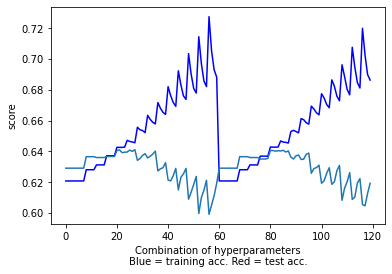

In [22]:
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result)
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

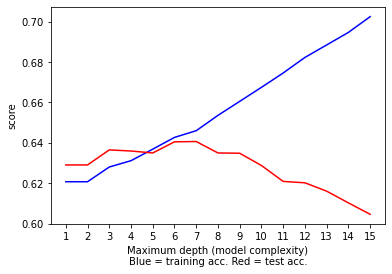

In [23]:
results_set['params']
dd = pd.DataFrame(results_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
    
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [24]:
print(CV1.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}


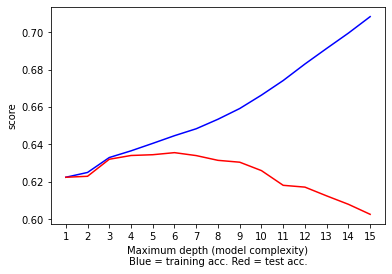

In [25]:
train_result = results_set['mean_train_score']
test_result = results_set['mean_test_score']
max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
    
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [26]:
CV1.fit(X_train, y_train)

print("Train accuracy: ", CV1.score(X_train, y_train))
print("Test accuracy: ", CV1.score(X_test, y_test))

Train accuracy:  0.6427033888950215
Test accuracy:  0.6399227301996137


In [27]:
CV1.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=10)

In [41]:
importances = CV1.best_estimator_.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:]

for i in indices:
    print(feature_names[i], ':', importances[i])

number_inpatient : 0.5847160154150457
discharge_disposition_id : 0.1599015974380108
number_emergency : 0.05631480009124843
number_outpatient : 0.0478839279662871
diabetesMed : 0.03494192905425346
number_diagnoses : 0.019512440604883895
num_medications : 0.01826039761953301
admission_type_id : 0.0171481831994704
num_lab_procedures : 0.014292740023506138
time_in_hospital : 0.013005944162757712
age_[80-90) : 0.012827883684115277
age_[70-80) : 0.00693761046167999
A1Cresult_None : 0.00521288452992352
race_Hispanic : 0.003227114425953134
metformin_No : 0.002918955154320056
race_Caucasian : 0.001384365241869756
gender_Female : 0.0010643788713183906
race_AfricanAmerican : 0.0004488320558233123
age_[40-50) : 0.0
age_[20-30) : 0.0
age_[10-20) : 0.0
age_[0-10) : 0.0
gender_Unknown/Invalid : 0.0
gender_Male : 0.0
race_Other : 0.0
race_Asian : 0.0
glimepiride_Steady : 0.0
glipizide_No : 0.0
glipizide_Steady : 0.0
glipizide_Up : 0.0
glyburide_Down : 0.0
glyburide_No : 0.0
glyburide_Steady : 0.0
num_

In [29]:
model2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=10)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=10)

In [30]:
print("Train accuracy:", model2.score(X_train, y_train))
print("Test accuracy:", model2.score(X_test, y_test))

Train accuracy: 0.6427033888950215
Test accuracy: 0.6399227301996137


In [31]:
x2 = model2.fit(X_train, y_train)

n_nodes2 = x2.tree_.node_count
print(n_nodes2)

125


In [32]:
tree_rules2 = export_text(model2)
print(tree_rules)

|--- feature_9 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_10 <= 6.50
|   |   |   |   |   |--- feature_27 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 18.00
|   |   |   |   |   |   |   |--- feature_28 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 5.50
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 23.50
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |--- feature_6 >  23.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 38.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  38.00
|   |   |   |   |   |   |   |   |   |

In [33]:
n_nodes = model2.tree_.node_count
children_left = model2.tree_.children_left
children_right = model2.tree_.children_right
feature = model2.tree_.feature
threshold = model2.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 125 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 9] <= 0.5 else to node 64.
	node=1 is a split node: go to node 2 if X[:, 8] <= 0.5 else to node 33.
		node=2 is a split node: go to node 3 if X[:, 11] <= 0.5 else to node 18.
			node=3 is a split node: go to node 4 if X[:, 7] <= 0.5 else to node 11.
				node=4 is a split node: go to node 5 if X[:, 10] <= 6.5 else to node 8.
					node=5 is a split node: go to node 6 if X[:, 27] <= 0.5 else to node 7.
						node=6 is a leaf node.
						node=7 is a leaf node.
					node=8 is a split node: go to node 9 if X[:, 0] <= 2.5 else to node 10.
						node=9 is a leaf node.
						node=10 is a leaf node.
				node=11 is a split node: go to node 12 if X[:, 1] <= 9.0 else to node 15.
					node=12 is a split node: go to node 13 if X[:, 4] <= 40.5 else to node 14.
						node=13 is a leaf node.
						node=14 is a leaf node.
					node=15 is a split node: go to node 16 if X[:, 1] <= 20.

In [34]:
y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_model2 = model2.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_model2 = roc_auc_score(y_test, y_pred_proba_dt_model2[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_model2)

ROC index on test for DT_default: 0.5633818644610716
ROC index on test for DT_optimal: 0.6721958507698365


In [35]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_model2, tpr_dt_model2, thresholds_dt_model2 = roc_curve(y_test, y_pred_proba_dt_model2[:,1])

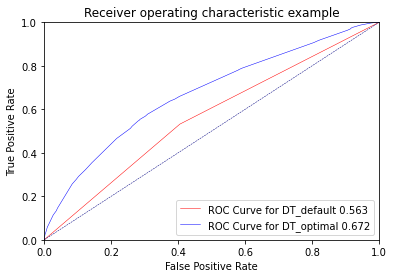

In [38]:
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_model2, tpr_dt_model2, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_model2), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [44]:
dt_best = model2
with open('DT.pickle', 'wb') as f:
 pickle.dump([dt_best,roc_index_dt_model2, fpr_dt_model2, tpr_dt_model2], f)

In [57]:
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_model2_test, fpr_dt_model2_test, tpr_dt_model2_test = pickle.load(f)

In [53]:
importances = dt_best.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', importances[i])

number_inpatient : 0.5847160154150457
discharge_disposition_id : 0.1599015974380108
number_emergency : 0.05631480009124843
number_outpatient : 0.0478839279662871
diabetesMed : 0.03494192905425346


In [59]:
roc_index_dt_model2

0.6721958507698365

0.6721958507698365